In [ ]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
batch_size = 32
num_epochs = 200
kernel_size = 3
pool_size = 2
conv_depth_1 = 32
conv_depth_2 = 64
drop_prob_1 = 0.25
drop_prob_2 = 0.5
hidden_size = 512

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_train, depth, height, width = X_train.shape
num_test = X_test.shape[0]
num_classes = np.unique(y_train).shape[0]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train)
X_test /= np.max(X_test)
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
inp = Input(shape=(depth, height, width))
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size-1, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size-1, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
conv_3 = Convolution2D(conv_depth_2, kernel_size, padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
net = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,verbose=1, validation_split=0.1)
model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/200
1407/1407 [==============================] - 10s 6ms/step - loss: 1.7288 - accuracy: 0.3509 - val_loss: 1.4062 - val_accuracy: 0.4752
Epoch 2/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4351 - accuracy: 0.4799 - val_loss: 1.2679 - val_accuracy: 0.5296
Epoch 3/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3328 - accuracy: 0.5174 - val_loss: 1.1655 - val_accuracy: 0.5814
Epoch 4/200
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2573 - accuracy: 0.5469 - val_loss: 1.1198 - val_accuracy: 0.5966
Epoch 5/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2056 - accuracy: 0.5701 - val_loss: 1.1183 - val_accuracy: 0.6016
Epoch 6/200
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1640 - accuracy: 0.5875 - val_loss: 1.0509 - val_accuracy: 0.6262
Epoch 7/200
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1286 - accuracy: 0.5994 - val_loss: 1.0497 - val

[0.8965752720832825, 0.7035999894142151]

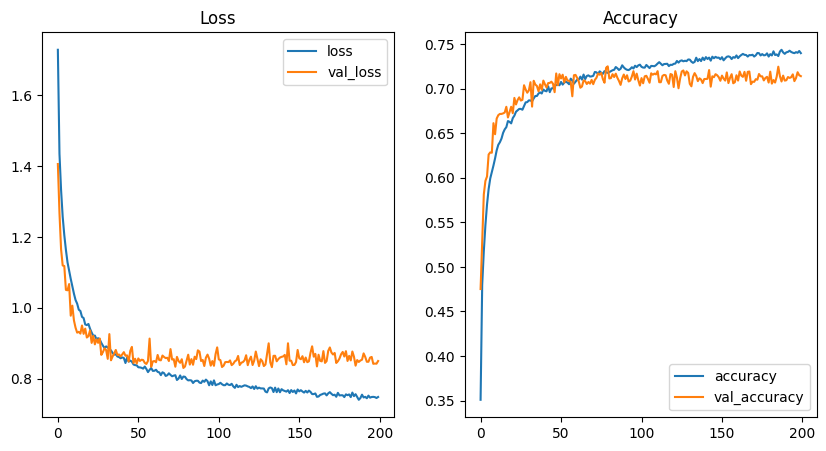

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(net.history["loss"], label="loss")
plt.plot(net.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(net.history["accuracy"], label="accuracy")
plt.plot(net.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()


In [ ]:
inp = Input(shape=(depth, height, width))
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size-1, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size-1, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
conv_3 = Convolution2D(conv_depth_2, kernel_size, padding='same', activation='relu')(pool_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
flat = Flatten()(pool_2)
hidden = Dense(hidden_size, activation='relu')(flat)
out = Dense(num_classes, activation='softmax')(hidden)

model_without_dropout = Model(inputs=inp, outputs=out)
model_without_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
net_whithout_dropout = model_without_dropout.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,verbose=1, validation_split=0.1)
model_without_dropout.evaluate(X_test, Y_test, verbose=1)

Epoch 1/200
1407/1407 [==============================] - 10s 6ms/step - loss: 1.5476 - accuracy: 0.4304 - val_loss: 1.3068 - val_accuracy: 0.5328
Epoch 2/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2071 - accuracy: 0.5661 - val_loss: 1.1546 - val_accuracy: 0.5866
Epoch 3/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0537 - accuracy: 0.6241 - val_loss: 1.1056 - val_accuracy: 0.6026
Epoch 4/200
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9499 - accuracy: 0.6593 - val_loss: 1.0148 - val_accuracy: 0.6464
Epoch 5/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8653 - accuracy: 0.6911 - val_loss: 0.9901 - val_accuracy: 0.6504
Epoch 6/200
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7894 - accuracy: 0.7167 - val_loss: 1.0049 - val_accuracy: 0.6552
Epoch 7/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7220 - accuracy: 0.7430 - val_loss: 0.9701 - val_a

[7.905659198760986, 0.605400025844574]

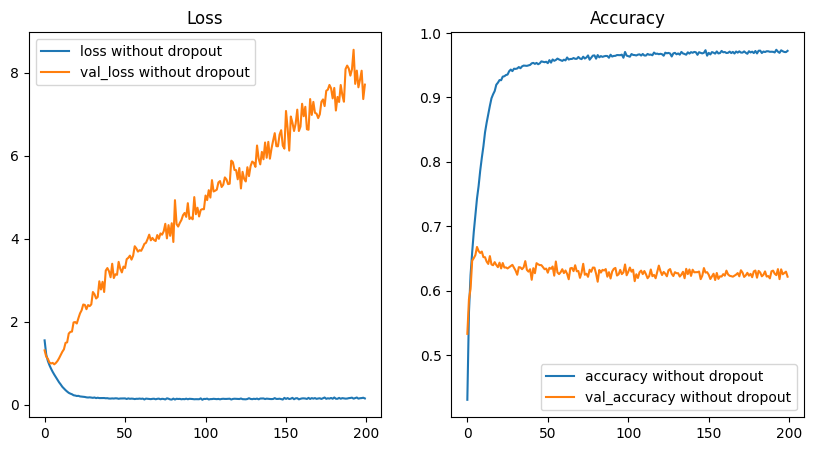

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(net_whithout_dropout.history["loss"], label="loss without dropout")
plt.plot(net_whithout_dropout.history["val_loss"], label="val_loss without dropout")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(net_whithout_dropout.history["accuracy"], label="accuracy without dropout")
plt.plot(net_whithout_dropout.history["val_accuracy"], label="val_accuracy without dropout")
plt.title("Accuracy")
plt.legend()
plt.show()

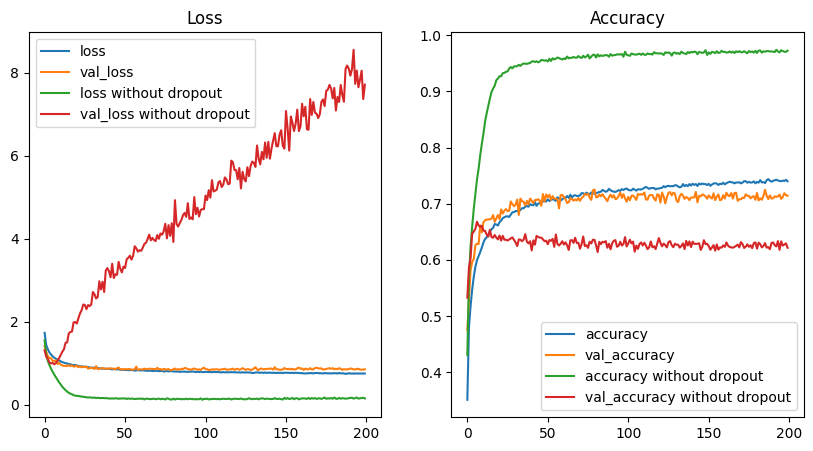

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(net.history["loss"], label="loss")
plt.plot(net.history["val_loss"], label="val_loss")
plt.plot(net_whithout_dropout.history["loss"], label="loss without dropout")
plt.plot(net_whithout_dropout.history["val_loss"], label="val_loss without dropout")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(net.history["accuracy"], label="accuracy")
plt.plot(net.history["val_accuracy"], label="val_accuracy")
plt.plot(net_whithout_dropout.history["accuracy"], label="accuracy without dropout")
plt.plot(net_whithout_dropout.history["val_accuracy"], label="val_accuracy without dropout")
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
kernel_size = 5

In [ ]:
inp = Input(shape=(depth, height, width))
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size-1, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
conv_3 = Convolution2D(conv_depth_2, kernel_size, padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model_kernel5 = Model(inputs=inp, outputs=out)
model_kernel5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
net_kernel5 = model_kernel5.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,verbose=1, validation_split=0.1)
model_kernel5.evaluate(X_test, Y_test, verbose=1)

Epoch 1/200
1407/1407 [==============================] - 12s 7ms/step - loss: 1.7670 - accuracy: 0.3421 - val_loss: 1.5194 - val_accuracy: 0.4356
Epoch 2/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4751 - accuracy: 0.4650 - val_loss: 1.3154 - val_accuracy: 0.5244
Epoch 3/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3650 - accuracy: 0.5087 - val_loss: 1.2479 - val_accuracy: 0.5566
Epoch 4/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2964 - accuracy: 0.5354 - val_loss: 1.2134 - val_accuracy: 0.5678
Epoch 5/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2447 - accuracy: 0.5569 - val_loss: 1.1675 - val_accuracy: 0.5806
Epoch 6/200
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2027 - accuracy: 0.5712 - val_loss: 1.1416 - val_accuracy: 0.5948
Epoch 7/200
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1632 - accuracy: 0.5831 - val_loss: 1.1409 - v

[1.2805370092391968, 0.6273999810218811]

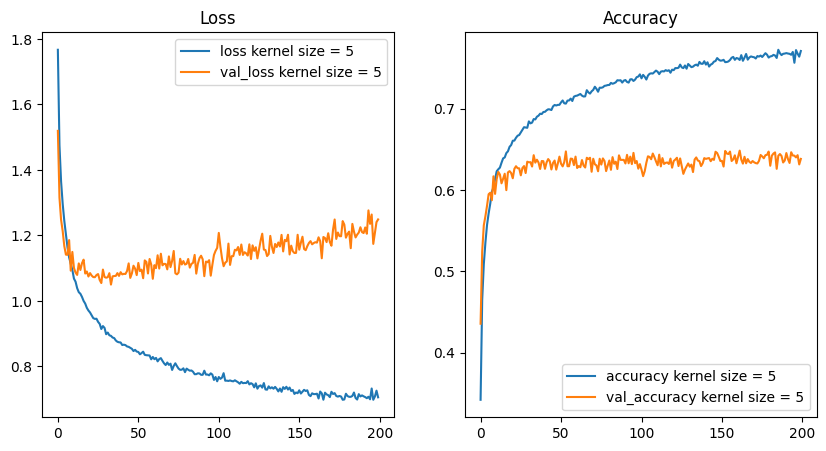

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(net_kernel5.history["loss"], label="loss kernel size = 5")
plt.plot(net_kernel5.history["val_loss"], label="val_loss kernel size = 5")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(net_kernel5.history["accuracy"], label="accuracy kernel size = 5")
plt.plot(net_kernel5.history["val_accuracy"], label="val_accuracy kernel size = 5")
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
kernel_size = 4

In [ ]:
inp = Input(shape=(depth, height, width))
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size-1, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size-1, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
conv_3 = Convolution2D(conv_depth_2, kernel_size, padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size-1, pool_size-1))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model_kernel10 = Model(inputs=inp, outputs=out)
model_kernel10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
net_kernel10 = model_kernel5.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,verbose=1, validation_split=0.1)
model_kernel10.evaluate(X_test, Y_test, verbose=1)

Epoch 1/200
1407/1407 [==============================] - 9s 7ms/step - loss: 0.7003 - accuracy: 0.7711 - val_loss: 1.2426 - val_accuracy: 0.6446
Epoch 2/200
1407/1407 [==============================] - 9s 6ms/step - loss: 0.7034 - accuracy: 0.7680 - val_loss: 1.2498 - val_accuracy: 0.6450
Epoch 3/200
1407/1407 [==============================] - 9s 6ms/step - loss: 0.7055 - accuracy: 0.7678 - val_loss: 1.1822 - val_accuracy: 0.6438
Epoch 4/200
1407/1407 [==============================] - 9s 6ms/step - loss: 0.7065 - accuracy: 0.7689 - val_loss: 1.2186 - val_accuracy: 0.6394
Epoch 5/200
1407/1407 [==============================] - 9s 6ms/step - loss: 0.7182 - accuracy: 0.7650 - val_loss: 1.2457 - val_accuracy: 0.6258
Epoch 6/200
1407/1407 [==============================] - 9s 7ms/step - loss: 0.7101 - accuracy: 0.7681 - val_loss: 1.2236 - val_accuracy: 0.6410
Epoch 7/200
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7086 - accuracy: 0.7664 - val_loss: 1.1855 - val_ac

[2.3026909828186035, 0.09830000251531601]

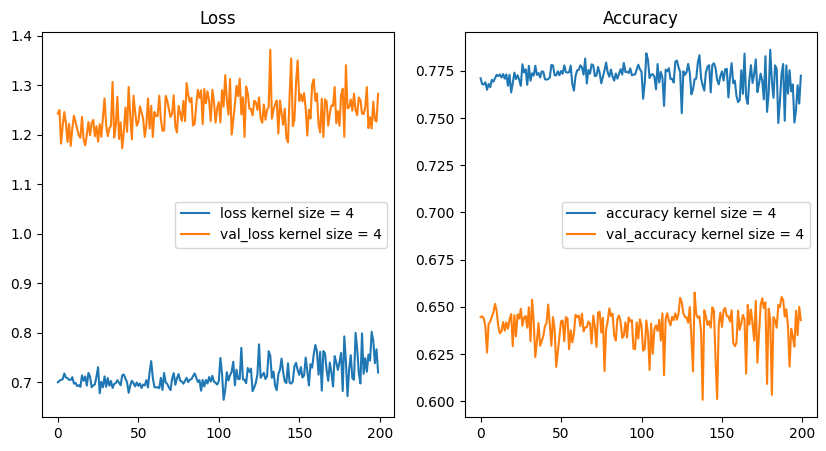

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(net_kernel10.history["loss"], label="loss kernel size = 4")
plt.plot(net_kernel10.history["val_loss"], label="val_loss kernel size = 4")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(net_kernel10.history["accuracy"], label="accuracy kernel size = 4")
plt.plot(net_kernel10.history["val_accuracy"], label="val_accuracy kernel size = 4")
plt.title("Accuracy")
plt.legend()
plt.show()

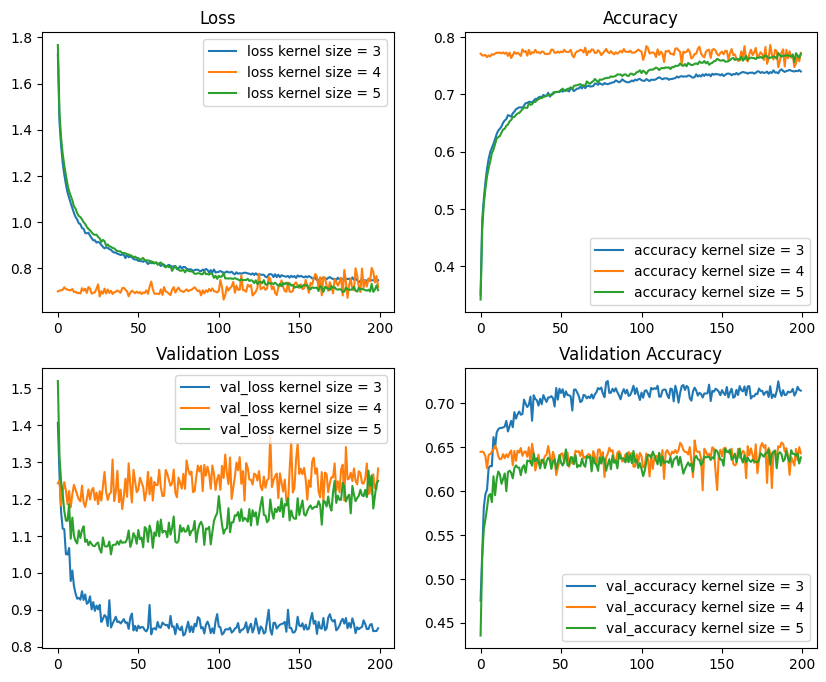

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.plot(net.history["loss"], label="loss kernel size = 3")
plt.plot(net_kernel10.history["loss"], label="loss kernel size = 4")
plt.plot(net_kernel5.history["loss"], label="loss kernel size = 5")
plt.title("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(net.history["val_loss"], label="val_loss kernel size = 3")
plt.plot(net_kernel10.history["val_loss"], label="val_loss kernel size = 4")
plt.plot(net_kernel5.history["val_loss"], label="val_loss kernel size = 5")
plt.title("Validation Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(net.history["accuracy"], label="accuracy kernel size = 3")
plt.plot(net_kernel10.history["accuracy"], label="accuracy kernel size = 4")
plt.plot(net_kernel5.history["accuracy"], label="accuracy kernel size = 5")
plt.title("Accuracy")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(net.history["val_accuracy"], label="val_accuracy kernel size = 3")
plt.plot(net_kernel10.history["val_accuracy"], label="val_accuracy kernel size = 4")
plt.plot(net_kernel5.history["val_accuracy"], label="val_accuracy kernel size = 5")
plt.title("Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
batch_size = 32
num_epochs = 50
kernel_size = 3
pool_size = 2
conv_depth_1 = 64
conv_depth_2 = 128
drop_prob_1 = 0.3
drop_prob_2 = 0.5
hidden_size = 512

In [ ]:
inp = Input(shape=(depth, height, width))
conv_1 = Convolution2D(conv_depth_1, kernel_size=(kernel_size,kernel_size), activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size=(kernel_size,kernel_size), activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)

conv_3 = Convolution2D(conv_depth_2, kernel_size=(kernel_size,kernel_size), padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size=(kernel_size,kernel_size), activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_2)(pool_2)

flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
hidden2 = Dense(hidden_size, activation='relu')(hidden)
drop_3 = Dropout(drop_prob_2)(hidden2)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
net = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,verbose=1, validation_split=0.2)
model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/50
1250/1250 [==============================] - 25s 10ms/step - loss: 1.7031 - accuracy: 0.3704 - val_loss: 1.3477 - val_accuracy: 0.5102
Epoch 2/50
1250/1250 [==============================] - 12s 9ms/step - loss: 1.2995 - accuracy: 0.5341 - val_loss: 1.0727 - val_accuracy: 0.6136
Epoch 3/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1223 - accuracy: 0.6022 - val_loss: 1.0088 - val_accuracy: 0.6476
Epoch 4/50
1250/1250 [==============================] - 12s 9ms/step - loss: 1.0094 - accuracy: 0.6492 - val_loss: 0.8651 - val_accuracy: 0.7009
Epoch 5/50
1250/1250 [==============================] - 13s 10ms/step - loss: 0.9198 - accuracy: 0.6766 - val_loss: 0.7926 - val_accuracy: 0.7209
Epoch 6/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8663 - accuracy: 0.6981 - val_loss: 0.7906 - val_accuracy: 0.7208
Epoch 7/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8165 - accuracy: 0.7144 - val_loss: 0.7603 - val

[0.8246536254882812, 0.7621999979019165]

In [ ]:
import random

def imshow_img(img, text1=None, text2 = None):
    plt.axis("off")
    if text1 and text2:
        plt.text(0, 0, text1, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
        plt.text(0, 4, text2, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})

    plt.imshow(img)

def decode(a):
  match a:
    case 0: return "airplane"
    case 1: return "automobile"
    case 2: return "bird"
    case 3: return "cat"
    case 4: return "deer"
    case 5: return "dog"
    case 6: return "frog"
    case 7: return "horse"
    case 8: return "ship"
    case 9: return "truck"

def show_predict():
    r = random.randint(1, len(X_test))
    img, lbl = X_test[r], Y_test[r]
    img = img.reshape(1, 32, 32, 3)

    out = model.predict(img)
    out_d = np.argmax(out)
    lbl_d = np.argmax(lbl)


    img = img.reshape(32, 32, 3)
    imshow_img(img, f'Predict: {decode(out_d)}', f'True: {decode(lbl_d)}')

    plt.show()

1/1 [==============================] - 0s 18ms/step


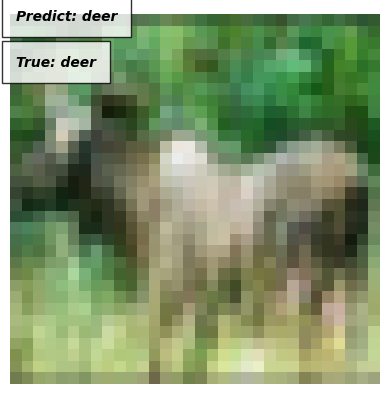

In [ ]:
show_predict()